In [11]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIModel as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json

from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")

# Network topology
#G = nx.karate_club_graph()
fh=open("Power.txt", 'rb')
G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
fh.close()
H = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None)

b=0.5
#--------------------------------------------------------------
# Model selection
model = si.SIModel(H)

# Model Configuration
cfg = mc.Configuration()

i=4326
deg_i = H.degree(i)
t_node = H.number_of_nodes()
b1= deg_i/t_node
cfg.add_model_parameter('beta', b)


infected_nodes1 = [i]
cfg.add_model_initial_configuration("Infected", infected_nodes1)
model.set_initial_status(cfg)

# Simulation execution
#iterations = model.iteration_bunch(100)
#trends1 = model.build_trends(iterations)
trends1 = multi_runs(model, execution_number=10, iteration_number=500, nprocesses=4)

#--------------------------------------------------------------
# 2° Model selection
model1 = si.SIModel(H)

# 2° Model Configuration
cfg = mc.Configuration()

j=2681
deg_j = H.degree(j)
t_node = H.number_of_nodes()
b2= deg_j/t_node
cfg.add_model_parameter('beta', b)

infected_nodes2 = [j]
cfg.add_model_initial_configuration("Infected", infected_nodes2)
model1.set_initial_status(cfg)

# 3° Simulation execution
#iterations = model1.iteration_bunch(100)
#trends2 = model1.build_trends(iterations)
trends2  = multi_runs(model1, execution_number=10, iteration_number=500, nprocesses=4)

#--------------------------------------------------------------
# 3° Model selection
model2 = si.SIModel(H)

# 3° Model Configuration
cfg = mc.Configuration()

k=1066
deg_k = H.degree(k)
t_node = H.number_of_nodes()
b3= deg_k/t_node
cfg.add_model_parameter('beta', b)

infected_nodes3 = [k]
cfg.add_model_initial_configuration("Infected", infected_nodes3)
model2.set_initial_status(cfg)

# 3° Simulation execution
#iterations = model2.iteration_bunch(100)
#trends3 = model2.build_trends(iterations)
trends3 = multi_runs(model2, execution_number=10, iteration_number=500, nprocesses=4)
#--------------------------------------------------------------
# 4° Model selection
model3 = si.SIModel(H)

# 4° Model Configuration
cfg = mc.Configuration()

l=4360
deg_k = H.degree(l)
t_node = H.number_of_nodes()
b4= deg_k/t_node
cfg.add_model_parameter('beta', b)

infected_nodes3 = [l]
cfg.add_model_initial_configuration("Infected", infected_nodes3)
model3.set_initial_status(cfg)

# 4° Simulation execution
#iterations = model2.iteration_bunch(100)
#trends3 = model2.build_trends(iterations)
trends4 = multi_runs(model3, execution_number=10, iteration_number=500, nprocesses=4)

In [12]:
NT_i = nx.triangles(H,i)
NT_j = nx.triangles(H,j)
NT_l = nx.triangles(H,l)
b1,deg_i,b2,deg_j,b3, H.degree(k),b4, H.degree(l),NT_i,NT_j,NT_l

(0.0028334345274235984,
 14,
 0.0038453754300748835,
 19,
 0.0020238818053025702,
 10,
 0.002226269985832827,
 11,
 20,
 11,
 18)

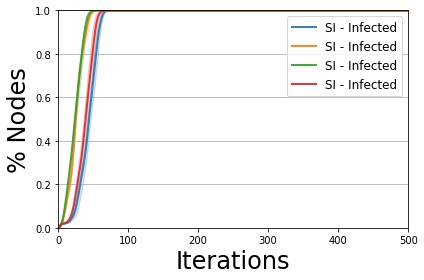

In [13]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model, model1, model2, model3], [trends1, trends2,trends3,trends4], statuses=['Infected'])
viz.plot(percentile=90)
#viz.plot("32_75_1312.png",percentile=90)

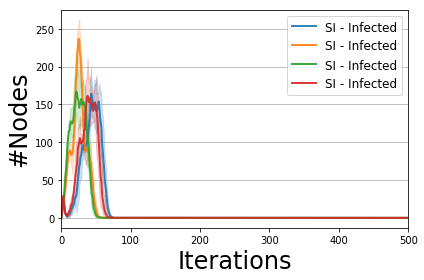

In [14]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([model, model1, model2, model3], [trends1, trends2,trends3,trends4], statuses=['Infected'])
viz.plot(percentile=90)
#viz.plot("32_75_1312p.png",percentile=90)

In [15]:
#"KCPrevalence_comparison.png"